In [2]:
# Let's start by importing numpy and setting a seed for the computer's pseudorandom number generator. 
# This allows us to reproduce the results from our script:
import numpy as np
np.random.seed(123)  # for reproducibility

In [3]:
# Sequential model type from Keras is simply a linear stack of neural network layers, and 
# it's perfect for the type of feed-forward CNN
from keras.models import Sequential
# from keras import backend as K
# K.set_image_dim_ordering('th')

Using Theano backend.


In [4]:
# let's import the "core" layers from Keras. These are the layers that are used in almost any neural network:
from keras.layers import Dense, Dropout, Activation, Flatten

In [5]:
# import the CNN layers from Keras. These are the convolutional layers that will help us efficiently train on image data:
from keras.layers import Convolution2D, MaxPooling2D

In [6]:
# import some utilities. This will help us transform our data later:
from keras.utils import np_utils

In [7]:
# The Keras library conveniently includes it already. We can load it like so:
from keras.datasets import mnist

In [8]:
# Load pre-shuffled MNIST data into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [9]:
# We can look at the shape of the dataset:
X_train.shape

(60000, 28, 28)

In [10]:
y_train.shape

(60000,)

In [11]:
X_test.shape

(10000, 28, 28)

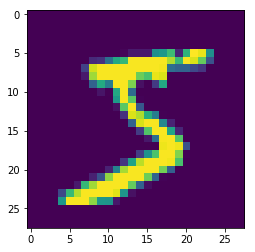

In [12]:
from matplotlib import pyplot as plt
plt.imshow(X_train[0])
plt.show()

In [13]:
# Preprocess input data for Keras.
# When using the Theano backend, you must explicitly declare a dimension for the depth of the input image. For example, a 
# full-color image with all 3 RGB channels will have a depth of 3.
# Our MNIST images only have a depth of 1, but we must explicitly declare that.
# Reshape input data
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)

In [14]:
# To confirm, we can print X_train's dimensions again:
X_train.shape

(60000, 1, 28, 28)

In [15]:
# The final preprocessing step for the input data is to convert our data type to float32 and normalize our data values to 
# the range [0, 1].
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [16]:
X_train[0]

array([[[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.  

In [17]:
# Preprocess class labels for Keras
y_train.shape

(60000,)

In [18]:
# We should have 10 different classes, one for each digit, but it looks like we only have a 1-dimensional array. 
# Let's take a look at the labels for the first 10 training samples:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [67]:
uniques, ids = np.unique(y_test, return_inverse=True)
uniques, ids

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([7, 2, 1, ..., 4, 5, 6], dtype=int64))

In [19]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [55]:
Y_test

array([[ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [20]:
Y_train.shape

(60000, 10)

In [21]:
# Define model architecture
# declaring a sequential model format:
model = Sequential()


In [22]:
# declare the CNN input layer:
model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(1,28,28)))
# model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(1,28,28), 
#                       dim_ordering='th',data_format="channels_first",))

In [23]:
# But what do the first 3 parameters represent? They correspond to the number of convolution filters to use, the number 
# of rows in each convolution kernel, and the number of columns in each convolution kernel, respectively.
# *Note: The step size is (1,1) by default, and it can be tuned using the 'subsample' parameter.
print (model.output_shape)

(None, 32, 26, 26)


In [24]:
# we can simply add more layers to our model like we're building legos:
model.add(Convolution2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

In [25]:
# So far, for model parameters, we've added two Convolution layers. To complete our model architecture, 
# let's add a fully connected layer and then the output layer:
# Fully connected Dense layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [26]:
# For Dense layers, the first parameter is the output size of the layer. Keras automatically handles the connections between 
# layers.

# Note that the final layer has an output size of 10, corresponding to the 10 classes of digits.

# Also note that the weights from the Convolution layers must be flattened (made 1-dimensional) before passing them to the 
# fully connected Dense layer.

In [27]:
# Now all we need to do is define the loss function and the optimizer, and then we'll be ready to train it.
# We just need to compile the model and we'll be ready to train it. When we compile the model, we declare the 
# loss function and the optimizer (SGD, Adam, etc.).
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [34]:
# To fit the model, all we have to do is declare the batch size and number of epochs to train for, then pass in 
# our training data.
history = model.fit(X_train, Y_train, validation_split=0.166666, 
          batch_size=32, epochs=10, verbose=1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 398s - loss: 0.0731 - acc: 0.9781 - val_loss: 0.0362 - val_acc: 0.9892

In [50]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 26, 26)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 24, 24)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 12, 12)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 12, 12)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               589952    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

In [35]:
# list all data in history
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


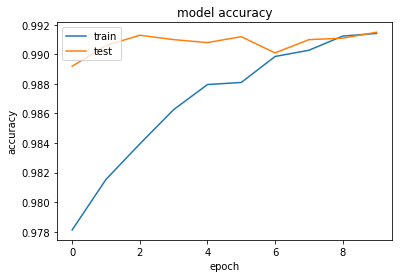

In [36]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

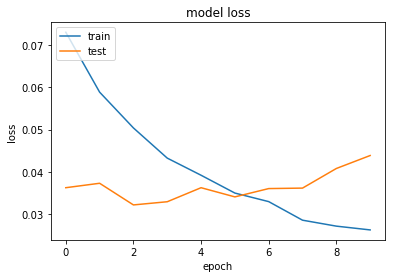

In [37]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [38]:
y_pred = model.predict(X_test)

In [87]:
y_pred.ravel()

array([  6.52808345e-16,   1.83475739e-12,   3.22217149e-11, ...,
         1.05504003e-20,   3.28553981e-12,   2.63107492e-14], dtype=float32)

In [95]:
reasult = y_pred.astype(int)
reasult = np.take(uniques,np.argmax(y_pred,1))
reasult

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [96]:
from pandas_ml import ConfusionMatrix
confusion_matrix = ConfusionMatrix(y_test, reasult)
print("Confusion matrix:\n%s" % confusion_matrix)

Confusion matrix:
Predicted    0     1     2     3    4    5    6     7    8    9  __all__
Actual                                                                  
0          976     0     1     0    0    0    1     1    1    0      980
1            0  1126     2     3    0    1    2     0    1    0     1135
2            2     0  1025     0    2    0    0     3    0    0     1032
3            0     0     2  1004    0    1    0     1    2    0     1010
4            0     0     0     0  977    0    1     0    1    3      982
5            1     0     1     8    0  878    2     1    0    1      892
6            3     2     0     0    1    3  947     0    2    0      958
7            0     2     9     0    0    1    0  1013    1    2     1028
8            1     0     2     1    0    0    0     0  969    1      974
9            1     1     0     1    7    2    0     2    4  991     1009
__all__    984  1131  1042  1017  987  886  953  1021  981  998    10000


In [97]:
confusion_matrix.stats_class

Classes,0,1,2,3,4,5,6,7,8,9
Population,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
P: Condition positive,980,1135,1032,1010,982,892,958,1028,974,1009
N: Condition negative,9020,8865,8968,8990,9018,9108,9042,8972,9026,8991
Test outcome positive,984,1131,1042,1017,987,886,953,1021,981,998
Test outcome negative,9016,8869,8958,8983,9013,9114,9047,8979,9019,9002
TP: True Positive,976,1126,1025,1004,977,878,947,1013,969,991
TN: True Negative,9012,8860,8951,8977,9008,9100,9036,8964,9014,8984
FP: False Positive,8,5,17,13,10,8,6,8,12,7
FN: False Negative,4,9,7,6,5,14,11,15,5,18
"TPR: (Sensitivity, hit rate, recall)",0.995918,0.99207,0.993217,0.994059,0.994908,0.984305,0.988518,0.985409,0.994867,0.982161


In [46]:
# Evaluate model on test data.
# Finally, we can evaluate our model on the test data:
score = model.evaluate(X_test, Y_test, verbose=1)

10000/10000 [==============================] - 32s     

In [47]:
score

[0.034557661541895004, 0.99060000000000004]

In [145]:
sum = 0
for i in range (y_test.size):
    sum =sum + abs(reasult[i].astype(int)-y_test[i].astype(int))
    print (sum, i, reasult[i],y_test[i])

0 0 7 7
0 1 2 2
0 2 1 1
0 3 0 0
0 4 4 4
0 5 1 1
0 6 4 4
0 7 9 9
0 8 5 5
0 9 9 9
0 10 0 0
0 11 6 6
0 12 9 9
0 13 0 0
0 14 1 1
0 15 5 5
0 16 9 9
0 17 7 7
0 18 3 3
0 19 4 4
0 20 9 9
0 21 6 6
0 22 6 6
0 23 5 5
0 24 4 4
0 25 0 0
0 26 7 7
0 27 4 4
0 28 0 0
0 29 1 1
0 30 3 3
0 31 1 1
0 32 3 3
0 33 4 4
0 34 7 7
0 35 2 2
0 36 7 7
0 37 1 1
0 38 2 2
0 39 1 1
0 40 1 1
0 41 7 7
0 42 4 4
0 43 2 2
0 44 3 3
0 45 5 5
0 46 1 1
0 47 2 2
0 48 4 4
0 49 4 4
0 50 6 6
0 51 3 3
0 52 5 5
0 53 5 5
0 54 6 6
0 55 0 0
0 56 4 4
0 57 1 1
0 58 9 9
0 59 5 5
0 60 7 7
0 61 8 8
0 62 9 9
0 63 3 3
0 64 7 7
0 65 4 4
0 66 6 6
0 67 4 4
0 68 3 3
0 69 0 0
0 70 7 7
0 71 0 0
0 72 2 2
0 73 9 9
0 74 1 1
0 75 7 7
0 76 3 3
0 77 2 2
0 78 9 9
0 79 7 7
0 80 7 7
0 81 6 6
0 82 2 2
0 83 7 7
0 84 8 8
0 85 4 4
0 86 7 7
0 87 3 3
0 88 6 6
0 89 1 1
0 90 3 3
0 91 6 6
0 92 9 9
0 93 3 3
0 94 1 1
0 95 4 4
0 96 1 1
0 97 7 7
0 98 6 6
0 99 9 9
0 100 6 6
0 101 0 0
0 102 5 5
0 103 4 4
0 104 9 9
0 105 9 9
0 106 2 2
0 107 1 1
0 108 9 9
0 109 4 4
0 110 8 8


In [146]:
sum

347

In [147]:
MAE = sum/y_test.size

In [148]:
MAE

0.034700000000000002